In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart.csv')
# print top 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.shape

(303, 14)

In [5]:
# Getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Sttistical information about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

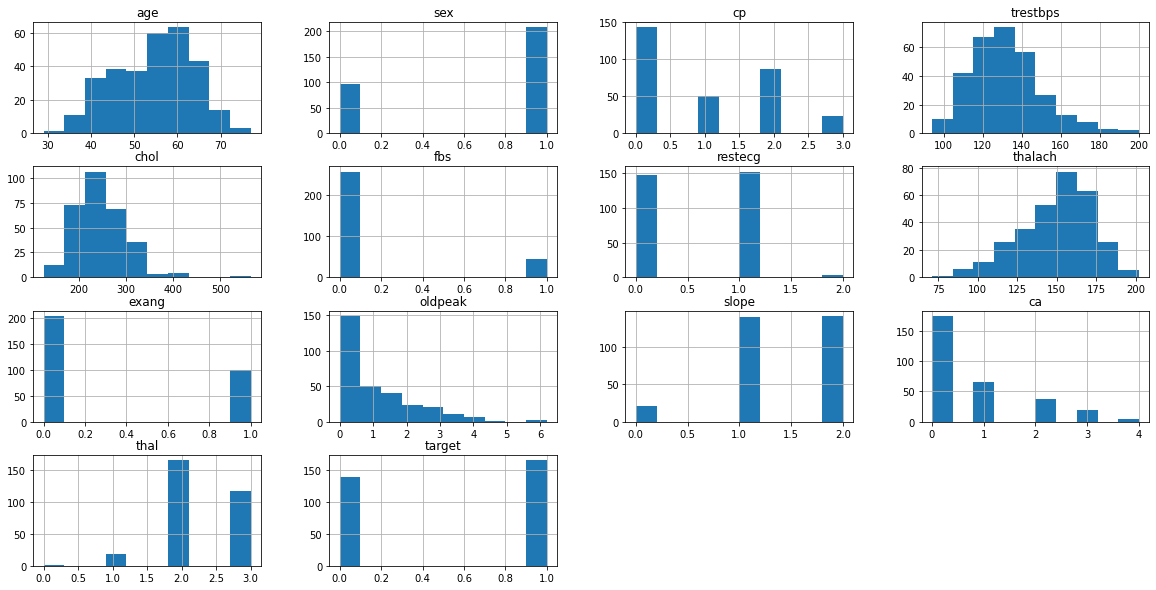

In [7]:
# plotting histograms
df.hist(figsize=(20,10))

In [8]:
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

In [9]:
# checking for the distribution of target variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
## splitting the independent and dependent features
x=df.drop('target',axis=1)
y=df['target']

In [12]:
print(x.head())
print("\n")
print(y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [13]:
# Splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(242, 13) (242,) (61, 13) (61,)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [16]:
lgr=LogisticRegression()
rfc=RandomForestClassifier()
svc=SVC()
knn=KNeighborsClassifier()

In [17]:
model=[lgr,rfc,svc,knn]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("accuracy score of ",m,":")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
          

accuracy score of  LogisticRegression() :
0.8852459016393442
[[25  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

accuracy score of  RandomForestClassifier() :
0.8524590163934426
[[24  5]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

accuracy score of  SVC() :
0.7049180327868853
[[15 14]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
        

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
for m in model:
    print("cross_val_score of" ,m,"is")
    scores=cross_val_score(m,x,y,cv=10)
    print(scores.mean())
    print(scores.std())

cross_val_score of LogisticRegression() is
0.8283870967741935
0.0660204546166953
cross_val_score of RandomForestClassifier() is
0.8248387096774193
0.06865648234454581
cross_val_score of SVC() is
0.6604301075268817
0.08164937488153536
cross_val_score of KNeighborsClassifier() is
0.6535483870967742
0.08083676164100669


from the above observations logistic regression is the best fit model for our dataset.

# Hyper parameter tuning 

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2','elasticnet','none']
c= [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c)
grid_search=GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,scoring='accuracy')
grid_result=grid_search.fit(x_train,y_train)

In [22]:
print(grid_result.best_params_)
print(grid_result.best_score_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.8263605442176871


In [23]:
lgrbest=LogisticRegression(C=1.0, penalty='l2', solver= 'liblinear')
lgrbest.fit(x_train,y_train)
predictions=lgrbest.predict(x_test)
print(accuracy_score(y_test,predictions))

0.8688524590163934


## Building a predictive system

In [24]:
input_data=(57,0,0,120,354,0,1,163,1,0.6,2,0,2)

# Change the input data to numpy array
input_data_np=np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped=input_data_np.reshape(1,-1)

prediction=lgrbest.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
    print("The person does not have a Heart Disease")
else:
    print("The person has Heart Disease")

[1]
The person has Heart Disease


In [25]:
import pickle

In [26]:
file=open("HD check.pkl","wb")
pickle.dump(lgrbest,file)
file.close()

In [27]:
picklefile=pickle.load(open("HD check.pkl","rb"))
pred=picklefile.predict(x_test)
print(pred)

[0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
